# **FEATURE SELECTION USING EVOLUTIONARY TECHNIQUES**

**MNIST DATA SET**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Convert labels to 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

# Step 1: Random shuffle
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffled = X_train[indices]
y_train_shuffled = y_train[indices]



11490434/11490434 [==============================] - 0s 0us/step


**NO Faeture Selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a baseline classifier using all features
baseline_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_classifier.fit(X_train, y_train)

# Predict labels on the test set using the trained baseline classifier
y_pred_baseline = baseline_classifier.predict(X_test)

# Calculate accuracy of the baseline classifier on the test set
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline accuracy:", baseline_accuracy)


Baseline accuracy: 0.4654


**Particle Swarm Optimization**

In [ ]:
#PSO
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images to vectors
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Convert labels to 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

# Random shuffle
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffled = X_train[indices]
y_train_shuffled = y_train[indices]

def fitness_function(feature_subset):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_shuffled[:, feature_subset], y_train_shuffled)
    y_pred = model.predict(X_test[:, feature_subset])
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

num_particles = 7
num_features = X_train.shape[1]
max_iter = 4
w = 0.5  # Inertia weight
c1 = 2.0  # Cognitive weight
c2 = 2.0  # Social weight

# Initialize particle positions and velocities
particles_position = np.random.randint(2, size=(num_particles, num_features))  # Binary array indicating selected features
particles_velocity = np.random.uniform(-1, 1, size=(num_particles, num_features))

# Initialize personal best positions and fitness values
personal_best_position = particles_position.copy()
personal_best_fitness = np.zeros(num_particles)

# Initialize global best position and fitness value
global_best_position = np.zeros(num_features)
global_best_fitness = 0.0

# PSO algorithm
for iteration in range(max_iter):
    for i in range(num_particles):
        # Evaluate fitness of current particle
        fitness = fitness_function(particles_position[i])

        # Update personal best position and fitness
        if fitness > personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_position[i] = particles_position[i]

        # Update global best position and fitness
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i]

    # Update particle velocities and positions
    for i in range(num_particles):
        r1 = np.random.rand(num_features)
        r2 = np.random.rand(num_features)
        particles_velocity[i] = (w * particles_velocity[i] +
                                 c1 * r1 * (personal_best_position[i] - particles_position[i]) +
                                 c2 * r2 * (global_best_position - particles_position[i]))
        particles_position[i] = np.round(1 / (1 + np.exp(-particles_velocity[i])))

# Extract selected features from global best position
selected_features = np.where(global_best_position == 1)[0]

# Train final classifier using selected features
final_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_classifier.fit(X_train_shuffled[:, selected_features], y_train_shuffled)

# Evaluate final classifier on test set
y_pred_test = final_classifier.predict(X_test[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy with selected features:", test_accuracy)


Test accuracy with selected features: 0.9649


Genetic Algorithm

In [ ]:
#GA
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Convert labels to 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

# Genetic Algorithm Parameters
POPULATION_SIZE = 20
GENES_SIZE = X_train.shape[1]
MUTATION_RATE = 0.1
GENERATIONS = 2

def create_individual():
    return np.random.choice([0, 1], size=GENES_SIZE)

def fitness(individual, X_train, X_test, y_train, y_test):
    selected_features = X_train[:, individual == 1]
    clf = SVC(kernel='linear')
    clf.fit(selected_features, y_train)
    selected_test_features = X_test[:, individual == 1]
    y_pred = clf.predict(selected_test_features)
    return accuracy_score(y_test, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(0, GENES_SIZE)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual

# Initialize population
population = [create_individual() for _ in range(POPULATION_SIZE)]

# Main genetic algorithm loop
for generation in range(GENERATIONS):
    print("Generation:", generation)
    fitness_scores = [fitness(individual, X_train, X_test, y_train, y_test) for individual in population]

    # Select best individuals
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    top_individuals = sorted_population[:int(0.2 * POPULATION_SIZE)]

    # Create next generation
    next_generation = top_individuals.copy()

    # Crossover and mutate
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(top_individuals, 2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        next_generation.extend([child1, child2])

    population = next_generation

# Get the best individual from the final population
best_individual = max(population, key=lambda individual: fitness(individual, X_train, X_test, y_train, y_test))
selected_features_indices = np.where(best_individual == 1)[0]

# Train SVM classifier with selected features
selected_features_train = X_train[:, selected_features_indices]
selected_features_test = X_test[:, selected_features_indices]
clf = SVC(kernel='linear')
clf.fit(selected_features_train, y_train)
y_pred = clf.predict(selected_features_test)

# Calculate accuracy
accuracyga = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracyga)


Generation: 0
Generation: 1
Accuracy: 0.9423


In [ ]:
pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
pip install genetic_algorithm

  Preparing metadata (setup.py) ... done
  Created wheel for genetic_algorithm: filename=genetic_algorithm-1.0.0-py3-none-any.whl size=7616 sha256=a06fb37014b3cb732ea03a29a96a72632ac4de60f6ee69e00473eabfc5e304a7
  Stored in directory: /root/.cache/pip/wheels/4c/2c/bf/9c1f04950777c3f6a9d18237af6a2d3b7679aec18ff6a3b6be
Successfully built genetic_algorithm


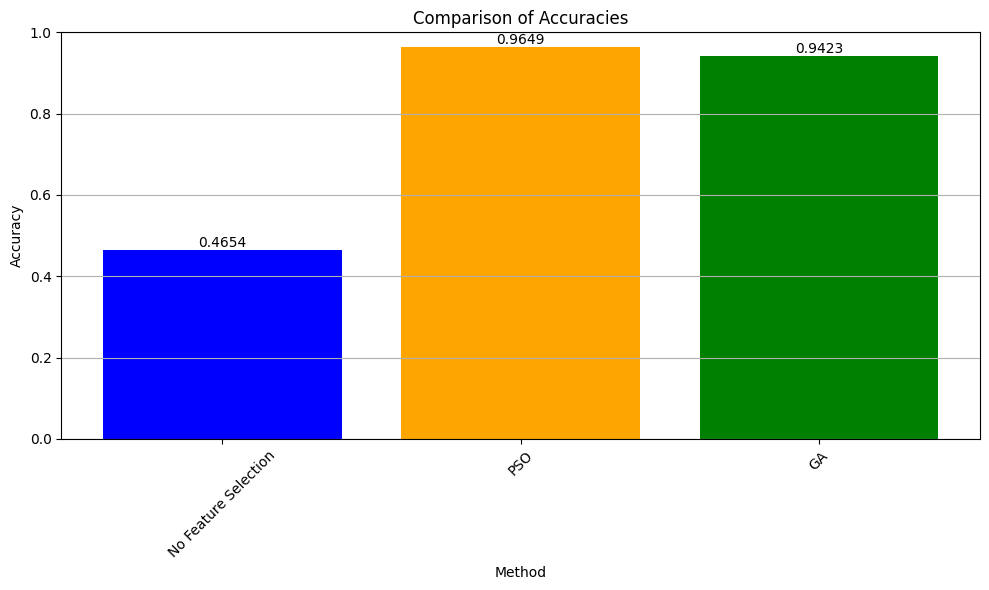

In [1]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = {
    "No Feature Selection": 0.4654,
    "PSO": 0.9649,
    "GA": 0.9423
}

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Accuracies')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add text labels
for i, acc in enumerate(accuracies.values()):
    plt.text(i, acc, str(acc), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


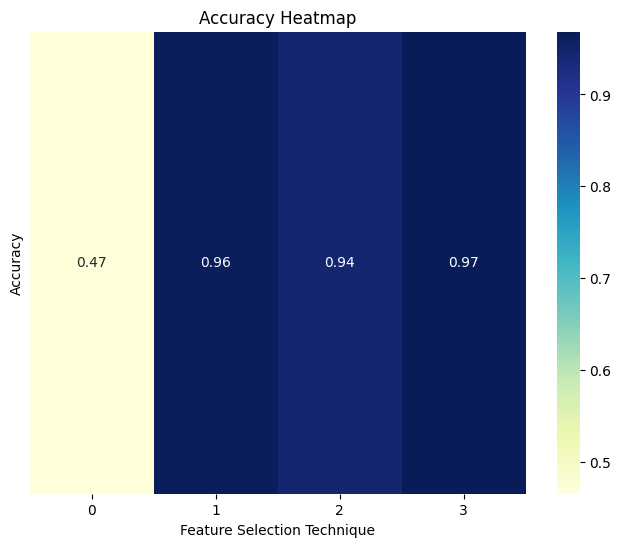

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given accuracies
accuracies = {
    "No Feature Selection": 0.4654,
    "PSO": 0.9649,
    "GA": 0.9423,
    "Hybrid": 0.9683
}

# Convert accuracies dictionary to lists for plotting
methods = list(accuracies.keys())
accuracy_values = list(accuracies.values())


# Create Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array([accuracy_values]), annot=True, cmap="YlGnBu", yticklabels=False)
plt.title('Accuracy Heatmap')
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy')
plt.show()
